In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../data/fifa_players.csv")

In [5]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [6]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [7]:
df.shape

(17954, 51)

In [8]:
# drop these columns as they have maximum null values and are not important for our project as well
df.drop(["national_team","national_rating","national_team_position","national_jersey_number"],axis=1,inplace=True)

In [9]:
df[df["value_euro"].isnull()].loc[:,["wage_euro"]].isnull().sum()
# dropping the columns with no wage and value euro as it is in less quantity
df.dropna(subset=["value_euro","wage_euro"],inplace=True)

In [10]:
df.isnull().sum()

name                                0
full_name                           0
birth_date                          0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                          0
wage_euro                           0
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
release_clause_euro              1582
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_accuracy                   0
long_passing

In [11]:
df['release_clause_euro']

0        226500000.0
1        133800000.0
2        144200000.0
3        105400000.0
4        106500000.0
            ...     
17949      1800000.0
17950       295000.0
17951       289000.0
17952       532000.0
17953       626000.0
Name: release_clause_euro, Length: 17699, dtype: float64

In [12]:
# filling the release_clause_euro with 1.5 times its value_euro
df["release_clause_euro"].fillna(df["value_euro"]*1.5,inplace=True)

In [13]:
df.isnull().sum()

name                             0
full_name                        0
birth_date                       0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration        

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17699 non-null  object 
 1   full_name                      17699 non-null  object 
 2   birth_date                     17699 non-null  object 
 3   age                            17699 non-null  int64  
 4   height_cm                      17699 non-null  float64
 5   weight_kgs                     17699 non-null  float64
 6   positions                      17699 non-null  object 
 7   nationality                    17699 non-null  object 
 8   overall_rating                 17699 non-null  int64  
 9   potential                      17699 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17699 non-null  float64
 12  preferred_foot                 17699 non-null  obje

In [15]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,1.769900e+04,17699.000000,17699.000000,17699.000000,17699.000000,...,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000
mean,25.533533,174.930355,75.290225,66.225662,71.449686,2.479280e+06,9905.192384,1.111984,2.945703,2.362450,...,46.865699,55.835132,46.663992,49.893271,53.445279,48.346799,58.672128,47.155998,47.736765,45.709080
std,4.696970,14.036180,7.086058,6.974595,6.134616,5.687014e+06,22000.455764,0.393044,0.663312,0.762802,...,19.414235,17.372481,20.747410,19.680973,14.117230,15.786098,11.616310,20.008669,21.654611,21.266062
min,17.000000,152.400000,49.900000,47.000000,50.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [16]:
df.dtypes
df.nunique()
for col in df.columns:
    if df[col].nunique()<20:
        df[col] = df[col].astype("category")


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   name                           17699 non-null  object  
 1   full_name                      17699 non-null  object  
 2   birth_date                     17699 non-null  object  
 3   age                            17699 non-null  int64   
 4   height_cm                      17699 non-null  float64 
 5   weight_kgs                     17699 non-null  float64 
 6   positions                      17699 non-null  object  
 7   nationality                    17699 non-null  object  
 8   overall_rating                 17699 non-null  int64   
 9   potential                      17699 non-null  int64   
 10  value_euro                     17699 non-null  float64 
 11  wage_euro                      17699 non-null  float64 
 12  preferred_foot                 17699 

In [18]:
df["overall_rating"]

0        94
1        88
2        88
3        88
4        88
         ..
17949    67
17950    59
17951    59
17952    59
17953    59
Name: overall_rating, Length: 17699, dtype: int64

In [19]:
df["potential"]

0        94
1        89
2        91
3        88
4        91
         ..
17949    70
17950    67
17951    67
17952    71
17953    75
Name: potential, Length: 17699, dtype: int64

In [20]:
df["age"].sort_values()

5135     17
6375     17
6338     17
6327     17
3119     17
         ..
12717    41
774      41
17919    41
16390    41
1304     46
Name: age, Length: 17699, dtype: int64

In [21]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle'],
      dtype='object')

In [22]:
#age,positions,overall_rating,body-type,skill-moves,crossing,finishing,heading-accuracy,short-passsing,volleys,dribbling,curve,freekick-accuracy,long-passing,ball-control,acceleration,sprint-speed,agility,reactions,balance,shot-power,jumping,stamina,strength,long-shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing-tackle,sliding-tackle,gk-diving,gk-handling,gk-kicking,gk-positioning,gk-reflexes,agility,reactions,balance,shot-power,jumping,stamina,strength,long-shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing-tackle,sliding-tackle

In [23]:
df["body_type"].value_counts()

body_type
Normal                 10223
Lean                    6400
Stocky                  1069
Akinfenwa                  1
C. Ronaldo                 1
Courtois                   1
Messi                      1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Name: count, dtype: int64

In [24]:
import seaborn as sns

<Axes: ylabel='age'>

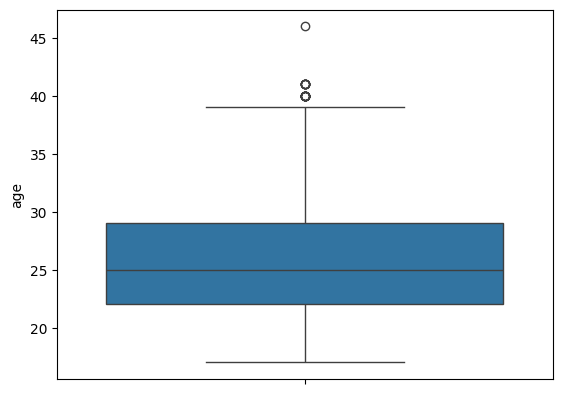

In [25]:
sns.boxplot(df["age"])

In [26]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [27]:
df["birth_date"]

0       1987-06-24
1       1992-02-14
2       1993-03-15
3       1991-06-04
4       1991-06-20
           ...    
17949   1993-10-07
17950   1996-02-02
17951   1996-04-09
17952   1997-06-19
17953   1999-05-15
Name: birth_date, Length: 17699, dtype: datetime64[ns]

In [28]:
# modifying age column to this date
df["age"] = (pd.to_datetime("today") - df["birth_date"]).dt.days//365

In [29]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,37,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,33,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,1993-03-15,31,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,1991-06-04,33,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,1991-06-20,33,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [30]:
#body-type,skill-moves,crossing,finishing,heading-accuracy,short-passsing,volleys,dribbling,curve,freekick-accuracy,long-passing,ball-control,acceleration,sprint-speed,agility,reactions,balance,shot-power,jumping,stamina,strength,long-shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing-tackle,sliding-tackle,gk-diving,gk-handling,gk-kicking,gk-positioning,gk-reflexes,agility,reactions,balance,shot-power,jumping,stamina,strength,long-shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing-tackle,sliding-tackle

<Axes: ylabel='overall_rating'>

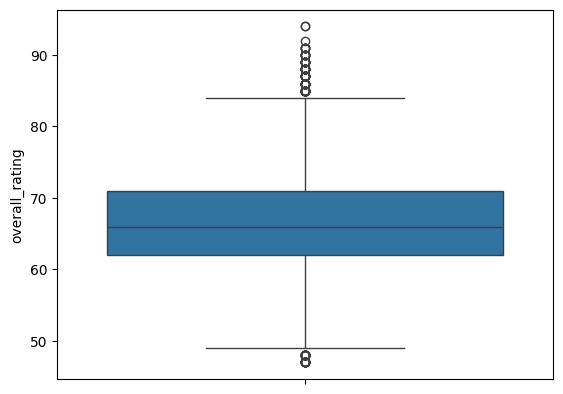

In [31]:
sns.boxplot(df["overall_rating"])

In [32]:
df[df["overall_rating"]<50].sort_values("overall_rating",ascending=True)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
4875,L. Offord,Luke Offord,1999-11-19,25,170.18,66.2,RB,England,47,59,...,29,45,47,40,32,23,35,44,50,45
4858,A. Kaltner,Alexander Kaltner,1999-10-24,25,175.26,72.1,ST,Germany,47,61,...,35,28,25,43,41,48,37,28,15,22
4881,K. Catalán,Kevin Catalán,1999-04-02,25,152.40,68.9,GK,Chile,47,62,...,7,16,14,5,31,10,29,6,14,13
4860,C. Ehlich,Christoph Ehlich,1999-02-02,26,170.18,68.0,RB,Germany,47,59,...,41,38,36,44,38,47,47,40,42,42
4861,Zhang Yufeng,张宇峰,1998-01-05,27,152.40,78.9,CM,China PR,47,59,...,34,55,43,29,50,43,39,53,41,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,C. Levingston,Conor Levingston,1998-01-21,27,175.26,73.9,CM,Republic of Ireland,49,59,...,45,56,46,45,43,37,42,46,45,44
4910,D. Mackay,Devlin Mackay,1997-01-23,28,190.50,81.2,GK,Scotland,49,56,...,20,18,23,14,19,24,30,12,18,18
4911,S. Väänänen,Santeri Väänänen,2002-01-01,23,152.40,69.9,CM,Finland,49,71,...,37,37,25,47,52,42,48,32,36,44
4849,N. Stephan,Nico Stephan,2000-08-24,24,190.50,83.9,GK,Germany,49,67,...,6,27,9,5,36,15,24,12,13,9


In [33]:
df["body_type"].value_counts()

body_type
Normal                 10223
Lean                    6400
Stocky                  1069
Akinfenwa                  1
C. Ronaldo                 1
Courtois                   1
Messi                      1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Name: count, dtype: int64

In [34]:
df.loc[df["body_type"].isin(["Akinfenwa","Courtois","Messi","Neymar","Shaqiri","C. Ronaldo","PLAYER_BODY_TYPE_25"]),"body_type"] = "Normal"

In [35]:
df["body_type"] = df["body_type"].astype("category")

In [36]:
df[df["body_type"].isin(["Akinfenwa","Courtois","Messi","Neymar","Shaqiri","C. Ronaldo","PLAYER_BODY_TYPE_25"])]

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle


In [37]:
df.dtypes

name                                     object
full_name                                object
birth_date                       datetime64[ns]
age                                       int64
height_cm                               float64
weight_kgs                              float64
positions                                object
nationality                              object
overall_rating                            int64
potential                                 int64
value_euro                              float64
wage_euro                               float64
preferred_foot                         category
international_reputation(1-5)          category
weak_foot(1-5)                         category
skill_moves(1-5)                       category
body_type                              category
release_clause_euro                     float64
crossing                                  int64
finishing                                 int64
heading_accuracy                        

In [38]:
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,37,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,33,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,1993-03-15,31,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,1991-06-04,33,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,1991-06-20,33,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,1993-10-07,31,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,1996-02-02,29,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,1996-04-09,28,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,1997-06-19,27,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [39]:
df["body_type"].value_counts()

body_type
Normal                 10230
Lean                    6400
Stocky                  1069
Akinfenwa                  0
C. Ronaldo                 0
Courtois                   0
Messi                      0
Neymar                     0
PLAYER_BODY_TYPE_25        0
Shaqiri                    0
Name: count, dtype: int64

In [40]:
#ball-control,acceleration,sprint-speed,agility,reactions,balance,shot-power,jumping,stamina,strength,long-shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing-tackle,sliding-tackle,gk-diving,gk-handling,gk-kicking,gk-positioning,gk-reflexes,agility,reactions,balance,shot-power,jumping,stamina,strength,long-shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing-tackle,sliding-tackle

<Axes: ylabel='ball_control'>

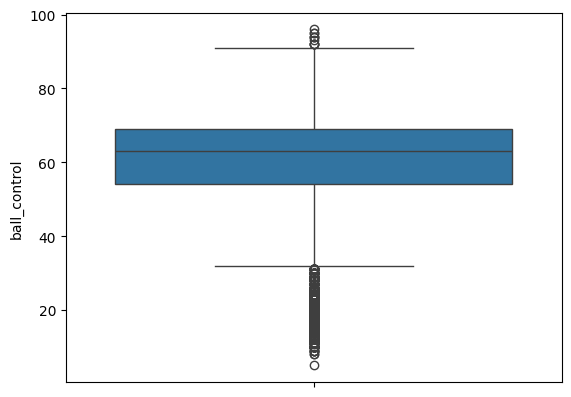

In [41]:
sns.boxplot(df["ball_control"])


In [42]:
df[df["dribbling"]<10]["dribbling"].sort_values(ascending=False)

74       9
6423     9
4916     9
4914     9
6542     9
        ..
5769     5
4706     4
5111     4
12017    4
2823     4
Name: dribbling, Length: 290, dtype: int64

In [43]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle'],
      dtype='object')

In [55]:
features = df.loc[:,"crossing":]

In [56]:
features[["potential","overall_rating","age"]] = df[["potential","overall_rating","age"]]

<Axes: >

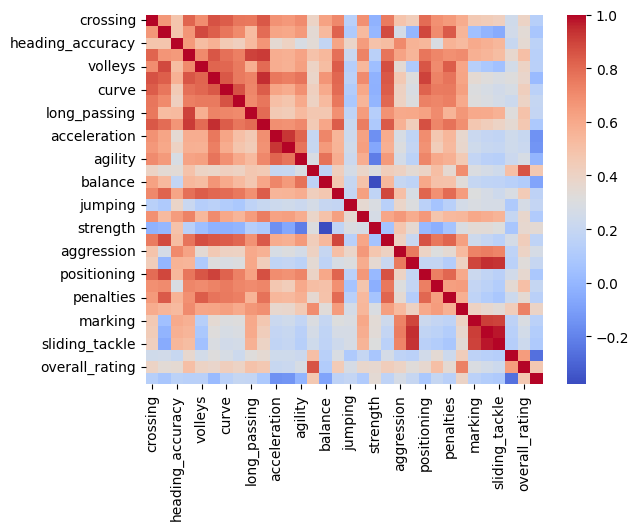

In [46]:
sns.heatmap(features.corr(),cmap="coolwarm")

In [47]:
features

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,potential,overall_rating,age
0,86,95,70,92,86,97,93,94,89,96,...,94,94,75,96,33,28,26,94,94,37
1,88,81,52,91,80,84,86,87,89,91,...,84,91,67,88,59,57,22,89,88,33
2,80,75,75,86,85,87,85,82,90,90,...,82,88,82,87,63,67,67,91,88,31
3,86,77,56,85,74,90,87,77,78,93,...,83,87,61,83,51,24,22,88,88,33
4,30,22,83,68,14,69,28,28,60,63,...,24,49,33,80,91,88,87,91,88,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,57,61,60,66,37,64,53,47,61,66,...,60,64,63,56,40,20,18,70,67,31
17950,50,19,53,55,31,52,26,28,43,53,...,42,39,32,52,53,64,60,67,59,29
17951,11,9,13,26,9,12,13,12,24,18,...,5,25,16,47,9,12,13,67,59,28
17952,42,60,55,49,49,57,47,39,37,56,...,54,52,50,53,16,18,17,71,59,27


<Axes: >

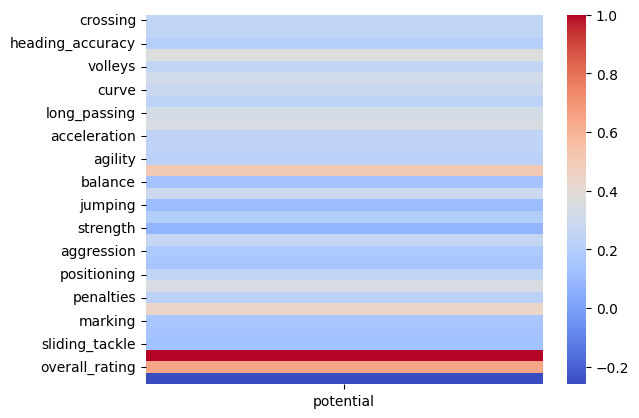

In [48]:
sns.heatmap(features.corr()["potential"].to_frame(),cmap="coolwarm")

In [49]:
features.corr()["potential"].sort_values(ascending=False)

potential            1.000000
overall_rating       0.646276
reactions            0.505206
composure            0.434262
short_passing        0.367346
ball_control         0.350149
vision               0.346345
long_passing         0.321517
dribbling            0.314748
shot_power           0.288969
curve                0.276799
long_shots           0.264632
volleys              0.254930
finishing            0.246704
positioning          0.246375
crossing             0.243489
sprint_speed         0.240918
acceleration         0.238832
freekick_accuracy    0.229518
penalties            0.226165
agility              0.224791
heading_accuracy     0.203303
stamina              0.197739
aggression           0.168882
marking              0.162621
interceptions        0.151394
standing_tackle      0.143512
balance              0.142741
sliding_tackle       0.129212
jumping              0.104683
strength             0.076919
age                 -0.259696
Name: potential, dtype: float64

In [50]:
# ['GK']
def player_category(position):
    positions = position.split(",")
    if all(pos in ["LW", "ST", "RW", "CF"] for pos in positions):
        return "Attacker"
    elif all(pos in ["LM", "RM", "CAM", "CM", "CDM"] for pos in positions):
        return "Midfielder"
    elif all(pos in ["CB", "LB", "LWB", "RB", "RWB"] for pos in positions):
        return "Defender"
    elif all(pos in ["GK"] for pos in positions):
        return "Goalkeeper"
    
    if any(pos in positions for pos in ["LW","ST","RW","CF"]) and any(pos in positions for pos in ["LM","RM","CAM","CM","CDM"]):
        return "Mid Attacker"
    elif any(pos in positions for pos in ["LM","RM","CAM","CM","CDM"]) and any(pos in positions for pos in ["CB","LB","LWB","RB","RWB"]):
        return "Mid Defender"
    
df["player_role"] = df["positions"].apply(player_category)

In [51]:
df.loc[df["positions"]==4,"positions"]

Series([], Name: positions, dtype: object)

In [52]:
df["player_role"].value_counts()

player_role
Midfielder      5031
Defender        4785
Attacker        2460
Goalkeeper      2024
Mid Attacker    1764
Mid Defender    1584
Name: count, dtype: int64

In [53]:
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,player_role
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,37,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,48,22,94,94,75,96,33,28,26,Attacker
1,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,33,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,46,56,84,91,67,88,59,57,22,Midfielder
2,P. Pogba,Paul Pogba,1993-03-15,31,190.50,83.9,"CM,CAM",France,88,91,...,78,64,82,88,82,87,63,67,67,Midfielder
3,L. Insigne,Lorenzo Insigne,1991-06-04,33,162.56,59.0,"LW,ST",Italy,88,88,...,34,26,83,87,61,83,51,24,22,Attacker
4,K. Koulibaly,Kalidou Koulibaly,1991-06-20,33,187.96,88.9,CB,Senegal,88,91,...,87,88,24,49,33,80,91,88,87,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,1993-10-07,31,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,69,41,60,64,63,56,40,20,18,Midfielder
17950,M. Sipľak,Michal Sipľak,1996-02-02,29,182.88,79.8,LB,Slovakia,59,67,...,62,55,42,39,32,52,53,64,60,Defender
17951,J. Bekkema,Jan Bekkema,1996-04-09,28,185.42,89.8,GK,Netherlands,59,67,...,27,10,5,25,16,47,9,12,13,Goalkeeper
17952,A. Al Yami,Abdulrahman Al Yami,1997-06-19,27,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,38,15,54,52,50,53,16,18,17,Mid Attacker


In [54]:
role = df.groupby("player_role")

<Axes: >

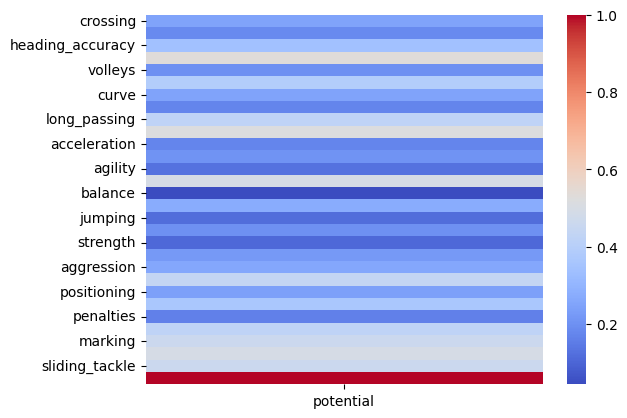

In [57]:
Attackersfeature = features.loc[features["player_role"] == "Mid Defender","crossing":"sliding_tackle"]
Attackersfeature["potential"] = df.loc[df["player_role"] == "Mid Defender","potential"]


sns.heatmap(Attackersfeature.corr().loc[:,"potential"].to_frame(),cmap="coolwarm")

In [58]:
Attackersfeature.corr()["potential"].sort_values(ascending=False)

potential            1.000000
short_passing        0.531274
ball_control         0.515602
reactions            0.495145
standing_tackle      0.494105
sliding_tackle       0.459477
marking              0.458707
interceptions        0.439562
composure            0.423760
long_passing         0.421495
dribbling            0.389447
vision               0.363256
heading_accuracy     0.341169
shot_power           0.273993
aggression           0.259102
crossing             0.248452
curve                0.248095
positioning          0.238645
long_shots           0.222294
sprint_speed         0.205354
volleys              0.199283
stamina              0.198558
finishing            0.184097
acceleration         0.173545
freekick_accuracy    0.171995
penalties            0.162154
agility              0.129297
jumping              0.115443
strength             0.106132
balance              0.043694
Name: potential, dtype: float64

In [207]:
features

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,...,vision,penalties,composure,marking,standing_tackle,sliding_tackle,player_role,potential,overall_rating,age
0,86,95,70,92,86,97,93,94,89,96,...,94,75,96,33,28,26,Forwarder,94,94,37
1,88,81,52,91,80,84,86,87,89,91,...,91,67,88,59,57,22,Midfielder,89,88,33
2,80,75,75,86,85,87,85,82,90,90,...,88,82,87,63,67,67,Midfielder,91,88,31
3,86,77,56,85,74,90,87,77,78,93,...,87,61,83,51,24,22,Forwarder,88,88,33
4,30,22,83,68,14,69,28,28,60,63,...,49,33,80,91,88,87,Defencer,91,88,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,57,61,60,66,37,64,53,47,61,66,...,64,63,56,40,20,18,Midfielder,70,67,31
17950,50,19,53,55,31,52,26,28,43,53,...,39,32,52,53,64,60,Defencer,67,59,29
17951,11,9,13,26,9,12,13,12,24,18,...,25,16,47,9,12,13,Goalkeeper,67,59,28
17952,42,60,55,49,49,57,47,39,37,56,...,52,50,53,16,18,17,Mid Attacker,71,59,27


In [1]:
# data cleaning Done
# Outliers handling done
# Some feature engineering done
# classfied player as attacker,defender,midfielder,goalkeeper,attacker-mid,defender-mid
# saw correlations of the features on these player roles individually

# Next see the best features for each position 

In [60]:
df.to_csv("../data/proccessed1_fifa_players.csv",index=False)

In [6]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/proccessed1_fifa_players.csv")
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'player_role'],
      dtype='object')

In [19]:
features = df.loc[:,"crossing":]
features[["potential","overall_rating","age","height_cm","weight_kgs"]] = df[["potential","overall_rating","age","height_cm","weight_kgs"]]

In [20]:
attacker = features[features["player_role"] == "Attacker"].drop(["player_role"],axis=1)
defender = features[features["player_role"] == "Defender"].drop(["player_role"],axis=1)
midfielder = features[features["player_role"] == "Midfielder"].drop(["player_role"],axis=1)
goalkeeper = features[features["player_role"] == "Goalkeeper"].drop(["player_role"],axis=1)
mid_attacker = features[features["player_role"] == "Mid Attacker"].drop(["player_role"],axis=1)
mid_defender = features[features["player_role"] == "Mid Defender"].drop(["player_role"],axis=1)

In [21]:
attacker.corr()["potential"].sort_values(ascending=False)

potential            1.000000
ball_control         0.611916
overall_rating       0.611328
dribbling            0.607594
finishing            0.545246
short_passing        0.535204
reactions            0.489570
positioning          0.481355
shot_power           0.460510
composure            0.459461
long_shots           0.455728
vision               0.445385
curve                0.411645
volleys              0.398310
crossing             0.368457
long_passing         0.367941
sprint_speed         0.328716
penalties            0.320706
acceleration         0.314362
freekick_accuracy    0.302623
agility              0.297024
heading_accuracy     0.208548
stamina              0.192018
marking              0.179119
balance              0.170938
standing_tackle      0.143442
aggression           0.121013
sliding_tackle       0.103519
jumping              0.100140
interceptions        0.089505
strength             0.039165
height_cm           -0.023286
weight_kgs          -0.038578
age       

In [18]:
defender.corr()["potential"].sort_values(ascending=False)

potential            1.000000
overall_rating       0.652000
standing_tackle      0.635870
sliding_tackle       0.611903
interceptions        0.583603
marking              0.560751
reactions            0.530249
short_passing        0.471037
composure            0.455278
heading_accuracy     0.437367
ball_control         0.433375
long_passing         0.372627
aggression           0.348470
dribbling            0.294075
shot_power           0.280759
sprint_speed         0.238144
vision               0.236283
stamina              0.200707
finishing            0.185780
curve                0.183741
long_shots           0.178031
volleys              0.177696
acceleration         0.173351
penalties            0.173028
strength             0.172922
jumping              0.172473
crossing             0.152757
positioning          0.142032
freekick_accuracy    0.118123
agility              0.102080
balance              0.011917
age                 -0.260303
Name: potential, dtype: float64

In [ ]:
# Defender Features => Age,weight,height,standing_tackle,sliding_tackle,interceptions,marking,reactions,short_passing,composure,overall_rating
# Attacker Features => Age,weight,height,ball_control,dribbling,finishing,short_passing,reactions,positioning,shot_power,composure,long_shots,overall_rating,curve,volleys,

In [22]:
attacker.corr()["potential"].sort_values(ascending=False)

potential            1.000000
ball_control         0.611916
overall_rating       0.611328
dribbling            0.607594
finishing            0.545246
short_passing        0.535204
reactions            0.489570
positioning          0.481355
shot_power           0.460510
composure            0.459461
long_shots           0.455728
vision               0.445385
curve                0.411645
volleys              0.398310
crossing             0.368457
long_passing         0.367941
sprint_speed         0.328716
penalties            0.320706
acceleration         0.314362
freekick_accuracy    0.302623
agility              0.297024
heading_accuracy     0.208548
stamina              0.192018
marking              0.179119
balance              0.170938
standing_tackle      0.143442
aggression           0.121013
sliding_tackle       0.103519
jumping              0.100140
interceptions        0.089505
strength             0.039165
height_cm           -0.023286
weight_kgs          -0.038578
age       

In [25]:
goalkeeper.corr()["potential"].sort_values(ascending=False)

potential            1.000000
overall_rating       0.700806
reactions            0.519146
composure            0.287986
vision               0.270986
jumping              0.260522
acceleration         0.251073
sprint_speed         0.240276
agility              0.229631
short_passing        0.195768
strength             0.181353
long_passing         0.175059
ball_control         0.172976
stamina              0.170190
dribbling            0.158202
interceptions        0.153247
penalties            0.140218
long_shots           0.137691
volleys              0.114186
height_cm            0.111175
shot_power           0.106278
finishing            0.096224
curve                0.096037
positioning          0.090692
weight_kgs           0.087909
marking              0.077342
aggression           0.063872
standing_tackle      0.043476
balance              0.039835
crossing             0.036542
freekick_accuracy    0.035110
heading_accuracy     0.032459
sliding_tackle       0.004267
age       

In [32]:
mid_defender.corr()["potential"].sort_values(ascending=False)

potential            1.000000
overall_rating       0.641973
short_passing        0.531274
ball_control         0.515602
reactions            0.495145
standing_tackle      0.494105
sliding_tackle       0.459477
marking              0.458707
interceptions        0.439562
composure            0.423760
long_passing         0.421495
dribbling            0.389447
vision               0.363256
heading_accuracy     0.341169
shot_power           0.273993
aggression           0.259102
crossing             0.248452
curve                0.248095
positioning          0.238645
long_shots           0.222294
sprint_speed         0.205354
volleys              0.199283
stamina              0.198558
finishing            0.184097
acceleration         0.173545
freekick_accuracy    0.171995
penalties            0.162154
agility              0.129297
jumping              0.115443
strength             0.106132
height_cm            0.095325
weight_kgs           0.092753
balance              0.043694
age       

In [23]:
attackerFeatures = features = [
    "age",                 # Essential for growth prediction  
    "height_cm",           # Affects aerial play & physicality  
    "weight_kgs",          # Strength & balance impact  
    "overall_rating",      # Baseline skill level  

    "ball_control",        # Key for dribbling & first touch  
    "dribbling",           # Crucial for beating defenders  
    "finishing",           # Essential for goal-scoring ability  
    "positioning",         # Determines off-ball movement  
    "shot_power",          # Impacts shooting effectiveness  
    "composure",           # Helps under pressure in goal situations  

    "short_passing",       # Important for link-up play  
    "vision",              # Crucial for assists & through balls  
    "long_shots",          # Helps attackers shoot from distance  
    "curve",               # Important for finesse shots & crosses  

    "sprint_speed"         # Essential for fast attackers  
]

In [24]:
defenderFeatures = [
    "age",                 # Essential for growth prediction  
    "height_cm",           # Taller defenders have better aerial ability  
    "weight_kgs",          # Affects physical strength in duels  
    "overall_rating",      # Baseline skill level  

    "standing_tackle",     # Crucial for defensive ability  
    "sliding_tackle",      # Important for last-ditch challenges  
    "interceptions",       # Ability to read the game  
    "marking",             # How well a defender tracks opponents  
    "reactions",           # Quick response to attacking threats  
    "short_passing",       # Helps in building from the back  

    "composure",           # Ability to stay calm under pressure  
    "heading_accuracy",    # Important for aerial duels  
    "long_passing",        # Useful for launching counterattacks  
    "aggression",          # Determines defensive intensity  
    "strength"             # Helps in physical battles with attackers  
]


In [26]:
goalkeeperFeatures = [
    "age",                 # Essential for growth prediction  
    "height_cm",           # Taller goalkeepers cover more area  
    "weight_kgs",          # Affects strength in aerial duels  
    "overall_rating",      # Baseline skill level  

    "reactions",           # Quick reflexes for shot-stopping  
    "composure",           # Staying calm under pressure  
    "vision",              # Helps in distribution and reading the game  
    "jumping",             # Important for aerial saves and crosses  
    "agility",             # Quick movements to stop shots  
    "short_passing",       # Essential for playing out from the back  

    "strength",            # Helps in physical duels  
    "long_passing",        # Useful for launching counterattacks  
    "positioning",         # Crucial for being in the right place  
]


In [29]:
midfielderFeatures = [
    "age",                 # Essential for potential prediction  
    "overall_rating",      # Baseline skill level  
    "ball_control",        # Crucial for maintaining possession  
    "dribbling",           # Important for progressing the ball  
    "short_passing",       # Key skill for quick link-up play  
    "long_passing",        # Required for switching play and creating chances  
    "vision",              # Awareness to make key passes  

    "reactions",           # Quick response to changes in play  
    "composure",           # Helps under pressure in tight spaces  
    "positioning",         # Finding space and making effective runs  
    "stamina",             # Midfielders need endurance for constant movement  

    "shot_power",          # Useful for long-range shots  
    "long_shots",          # Ability to score from distance  
    "interceptions",       # Defensive contribution to win back possession  
    "agility",             # Quick movements to evade challenges  
]


In [33]:
midAttackerFeatures = [
    "age",                 # Essential for potential prediction  
    "overall_rating",      # Baseline skill level  
    "dribbling",           # Key for beating defenders  
    "ball_control",        # Crucial for close control in attacking areas  
    "short_passing",       # Needed for quick link-up play and creating chances  
    "vision",              # Awareness to make through passes  
    "composure",           # Helps under pressure in the final third  
    "reactions",           # Quick response to game situations  
    "positioning",         # Smart movement in attacking areas  
    "finishing",           # Important for attacking midfielders who score  
    "shot_power",          # Strong shots from distance  
    "long_passing",        # Useful for deep playmakers  
    "curve",               # For bending shots and passes  
    "long_shots",          # Ability to score from outside the box  
    "acceleration"         # Burst of speed to beat defenders  
]


In [34]:
midDefenderFeatures = [
    "age",                 # Essential for potential prediction  
    "overall_rating",      # Baseline skill level  
    "short_passing",       # Important for distributing play  
    "ball_control",        # Helps in controlling the midfield  
    "reactions",           # Quick decision-making under pressure  
    "standing_tackle",     # Defensive ability to stop attackers  
    "sliding_tackle",      # Useful for last-ditch tackles  
    "marking",             # Tracking opponents off the ball  
    "interceptions",       # Ability to break opponent's attacks  
    "composure",           # Helps under pressure  
    "long_passing",        # Enables long-range playmaking  
    "vision",              # Awareness of passing options  
    "aggression",          # Needed for winning duels in midfield  
    "stamina",             # Required for covering large areas  
    "strength"             # Physical battles in midfield  
]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class DataLoader:
    def __init__(self):
        self.dataAddress = "../data/FINAL_fifa_players.csv"
        
    def load_data(self):
        data = pd.read_csv(self.dataAddress)
        return data
    
    def attacker(self):
        data = self.load_data()
        attackerData = data[data["player_role"] == "Attacker"]
        attackerFeatures = [
        "age",                 # Essential for growth prediction  
        "height_cm",           # Affects aerial play & physicality  
        "weight_kgs",          # Strength & balance impact  
        "overall_rating",      # Baseline skill level  

        "ball_control",        # Key for dribbling & first touch  
        "dribbling",           # Crucial for beating defenders  
        "finishing",           # Essential for goal-scoring ability  
        "positioning",         # Determines off-ball movement  
        "shot_power",          # Impacts shooting effectiveness  
        "composure",           # Helps under pressure in goal situations  

        "short_passing",       # Important for link-up play  
        "vision",              # Crucial for assists & through balls  
        "long_shots",          # Helps attackers shoot from distance  
        "curve",               # Important for finesse shots & crosses  

        "sprint_speed"         # Essential for fast attackers  
        ]
        return attackerFeatures,attackerData
        
        
        
    def defender(self):
        data = self.load_data()
        defenderData = data[data["player_role"] == "Defender"]
        defenderFeatures = [
    "age",                 # Essential for growth prediction  
    "height_cm",           # Taller defenders have better aerial ability  
    "weight_kgs",          # Affects physical strength in duels  
    "overall_rating",      # Baseline skill level  

    "standing_tackle",     # Crucial for defensive ability  
    "sliding_tackle",      # Important for last-ditch challenges  
    "interceptions",       # Ability to read the game  
    "marking",             # How well a defender tracks opponents  
    "reactions",           # Quick response to attacking threats  
    "short_passing",       # Helps in building from the back  

    "composure",           # Ability to stay calm under pressure  
    "heading_accuracy",    # Important for aerial duels  
    "long_passing",        # Useful for launching counterattacks  
    "aggression",          # Determines defensive intensity  
    "strength"             # Helps in physical battles with attackers  
    ]
        return defenderFeatures,defenderData
        
    def midfielder(self):
        data = self.load_data()
        midfielderData = data[data["player_role"] == "Midfielder"]
        midfielderFeatures = [
        "age",                 # Essential for potential prediction  
        "overall_rating",      # Baseline skill level  
        "ball_control",        # Crucial for maintaining possession  
        "dribbling",           # Important for progressing the ball  
        "short_passing",       # Key skill for quick link-up play  
        "long_passing",        # Required for switching play and creating chances  
        "vision",              # Awareness to make key passes  

        "reactions",           # Quick response to changes in play  
        "composure",           # Helps under pressure in tight spaces  
        "positioning",         # Finding space and making effective runs  
        "stamina",             # Midfielders need endurance for constant movement  

        "shot_power",          # Useful for long-range shots  
        "long_shots",          # Ability to score from distance  
        "interceptions",       # Defensive contribution to win back possession  
        "agility",             # Quick movements to evade challenges  
    ]
        return midfielderFeatures,midfielderData

    def goalkeeper(self):
        data = self.load_data()
        goalkeeperData = data[data["player_role"] == "Goalkeeper"]
        goalkeeperFeatures = [
        "age",                 # Essential for growth prediction  
        "height_cm",           # Taller goalkeepers cover more area  
        "weight_kgs",          # Affects strength in aerial duels  
        "overall_rating",      # Baseline skill level  

        "reactions",           # Quick reflexes for shot-stopping  
        "composure",           # Staying calm under pressure  
        "vision",              # Helps in distribution and reading the game  
        "jumping",             # Important for aerial saves and crosses  
        "agility",             # Quick movements to stop shots  
        "short_passing",       # Essential for playing out from the back  

        "strength",            # Helps in physical duels  
        "long_passing",        # Useful for launching counterattacks  
        "positioning",         # Crucial for being in the right place  
    ]
        return goalkeeperFeatures,goalkeeperData

    def mid_attacker(self):
        data = self.load_data()
        midAttackerData = data[data["player_role"] == "Mid Attacker"]
        midAttackerFeatures = [
        "age",                 # Essential for potential prediction  
        "overall_rating",      # Baseline skill level  
        "dribbling",           # Key for beating defenders  
        "ball_control",        # Crucial for close control in attacking areas  
        "short_passing",       # Needed for quick link-up play and creating chances  
        "vision",              # Awareness to make through passes  
        "composure",           # Helps under pressure in the final third  
        "reactions",           # Quick response to game situations  
        "positioning",         # Smart movement in attacking areas  
        "finishing",           # Important for attacking midfielders who score  
        "shot_power",          # Strong shots from distance  
        "long_passing",        # Useful for deep playmakers  
        "curve",               # For bending shots and passes  
        "long_shots",          # Ability to score from outside the box  
        "acceleration"         # Burst of speed to beat defenders  
    ]
        return midAttackerFeatures,midAttackerData
        
    def mid_defender(self):
        data = self.load_data()
        midDefenderData = data[data["player_role"] == "Mid Defender"]
        midDefenderFeatures = [
        "age",                 # Essential for potential prediction  
        "overall_rating",      # Baseline skill level  
        "short_passing",       # Important for distributing play  
        "ball_control",        # Helps in controlling the midfield  
        "reactions",           # Quick decision-making under pressure  
        "standing_tackle",     # Defensive ability to stop attackers  
        "sliding_tackle",      # Useful for last-ditch tackles  
        "marking",             # Tracking opponents off the ball  
        "interceptions",       # Ability to break opponent's attacks  
        "composure",           # Helps under pressure  
        "long_passing",        # Enables long-range playmaking  
        "vision",              # Awareness of passing options  
        "aggression",          # Needed for winning duels in midfield  
        "stamina",             # Required for covering large areas  
        "strength"             # Physical battles in midfield  
        ]
        return midDefenderFeatures,midDefenderData
    def data_visualisation(self):
        pass
    
    
if __name__ == "__main__":
    dataLoader = DataLoader()
    attackerFeatures,attackerData = dataLoader.attacker()
    defenderFeatures,defenderData = dataLoader.defender()
    midfielderFeatures,midfielderData = dataLoader.midfielder()
    goalkeeperFeatures,goalkeeperData = dataLoader.goalkeeper()
    midAttackerFeatures,midAttackerData = dataLoader.mid_attacker()
    midDefenderFeatures,midDefenderData = dataLoader.mid_defender()
    print(attackerData.head())
    print(defenderData.head())
    print(midfielderData.head())
    print(goalkeeperData.head())
    print(midAttackerData.head())
    print(midDefenderData.head())
    print(attackerFeatures)
    print(defenderFeatures)
    print(midfielderFeatures)
    print(goalkeeperFeatures)
    print(midAttackerFeatures)
    print(midDefenderFeatures)

            name                          full_name  birth_date  age  \
0       L. Messi     Lionel Andrés Messi Cuccittini  1987-06-24   37   
3     L. Insigne                    Lorenzo Insigne  1991-06-04   33   
7      S. Agüero  Sergio Leonel Agüero del Castillo  1988-06-02   36   
9      E. Cavani       Edinson Roberto Cavani Gómez  1987-02-14   38   
13  A. Griezmann                  Antoine Griezmann  1991-03-21   33   

    height_cm  weight_kgs positions nationality  overall_rating  potential  \
0      170.18        72.1  CF,RW,ST   Argentina              94         94   
3      162.56        59.0     LW,ST       Italy              88         88   
7      172.72        69.9        ST   Argentina              89         89   
9      185.42        77.1        ST     Uruguay              89         89   
13     175.26        73.0     CF,ST      France              89         90   

    ...  aggression  interceptions positioning  vision  penalties  composure  \
0   ...          4